# Attempt to plot rarefaction curves from metagenome data to estimate whether we are reaching a sufficient sampling depth for cheese metagenomes

This didn't work with the assembly, I think this type of plot will only work with reads.

In [1]:
setwd("..")

In [3]:
library(dplyr)
library(readr)
library(purrr)
library(tidyr)
library(tibble)
library(ggplot2)
library(vegan)

In [7]:
# read in sketches and convert to a wide data frame
sigs_i <- Sys.glob("outputs/sourmash_sketch_csv_abund/*k31.csv") %>%
  map_dfr(read_csv, col_types = "cdc") %>%
  pivot_wider(id_cols = name, values_from = "abund", names_from = "hash") %>%
  column_to_rownames("name") %>%
  replace(is.na(.), 0)

In [8]:
# return as a tidy data frame with per-sample information to calculate mean slope of each line
rarecurve <- rarecurve(sigs_i, step = 2, col = "grey", cex = 0.4, tidy = T,
                       xlab = "Number of k-mers sampled", ylab = "Number of distinct k-mers observed")

In [9]:
nrow(rarecurve)

[1] 199809

In [15]:
colnames(rarecurve) <- c("mgx", "num_kmers_sampled", "num_kmers_observed")

In [18]:
rarecurve_filtered <- rarecurve %>%
  filter(num_kmers_sampled %% 2 == 1)

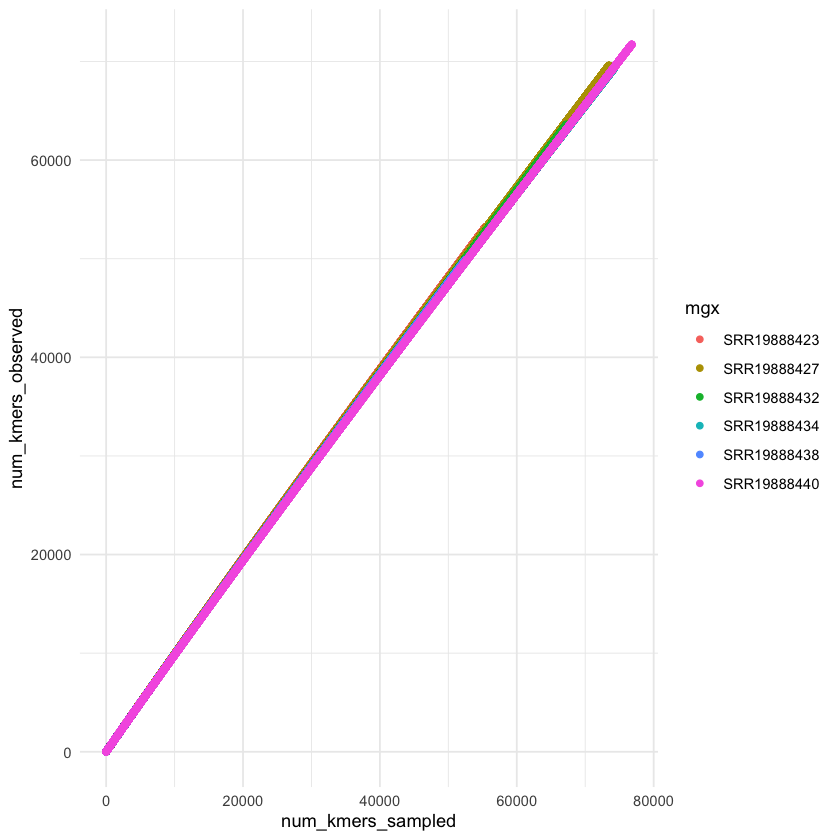

In [19]:
ggplot(rarecurve_filtered, aes(x = num_kmers_sampled, y = num_kmers_observed, color = mgx)) +
  geom_point() +
  theme_minimal()